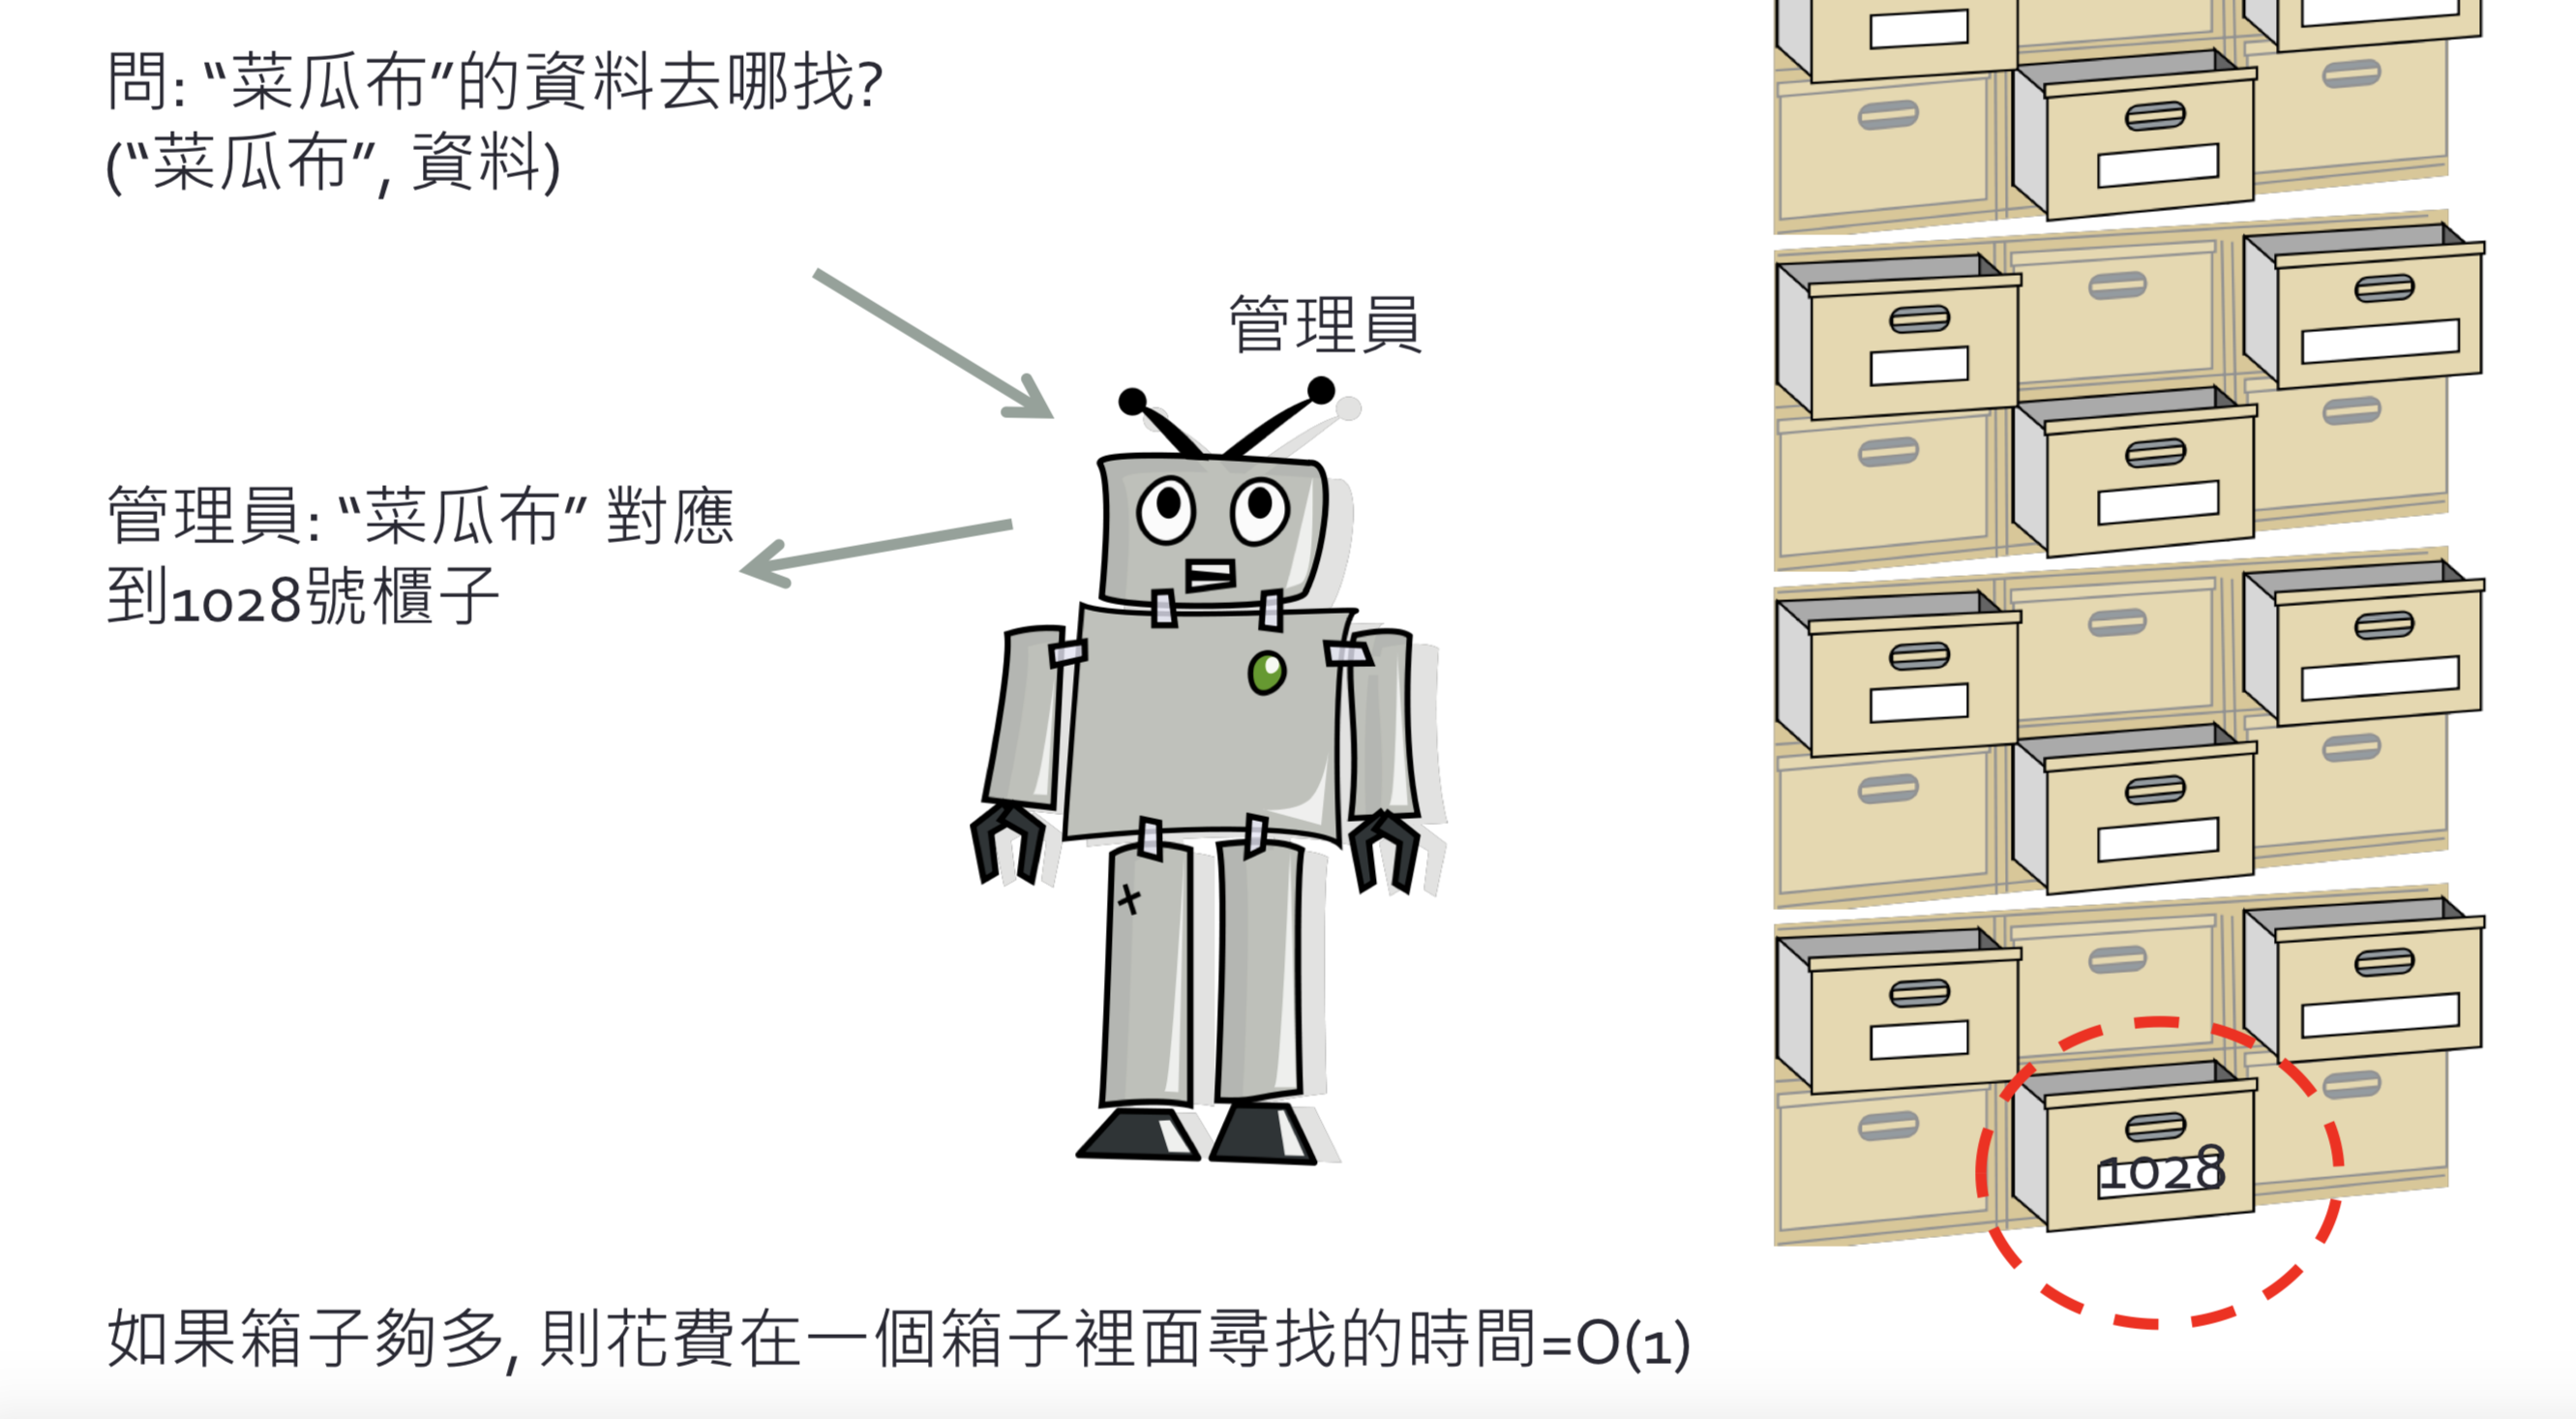

In [1]:
from IPython.display import Image
Image(filename = "/Users/maggie/Desktop/螢幕快照 2019-11-27 下午9.15.49.png")

#參考資料：https://www.csie.ntu.edu.tw/~hsinmu/courses/_media/dsa_12spring/hashing.pdf

這張圖是我覺得完全可以理解Hash table & hash Funtion是什麼的圖

1.“菜瓜布”就是一個被丟進入的值，而必須先“將菜瓜布轉換成hash function看得懂的十進位”
2.透過管理員，也就是“Hash function”，
3.找到菜瓜布所屬的位置，也就是“Hash table”

In [3]:
#generate a new MD5 hash
from Cryptodome.Hash import MD5
h = MD5.new()
print(h.hexdigest())

d41d8cd98f00b204e9800998ecf8427e


In [9]:
h = MD5.new()
h.update("apple".encode("utf-8"))
print(h.hexdigest())

#透過MD5將"apple"轉為16進位

#參考資料：老師上課講義：kite.com

1f3870be274f6c49b3e31a0c6728957f


In [10]:
h = MD5.new("banana".encode("utf-8"))
print(h.hexdigest())
#透過MD5將"banana"轉為16進位

72b302bf297a228a75730123efef7c41


In [14]:
h = MD5.new()
h.update("apple".encode("utf-8"))
print(h.hexdigest())
#16進位
print(int(h.hexdigest(), 16))
#再將16進位轉為10進位，方便後面的計算，這次作業採"mod"方式

1f3870be274f6c49b3e31a0c6728957f
41499123188802761002464065009245263231


被丟入的key經過MD5轉換，再取餘數，可以拿來當“索引”，當作table的index
例如：餘數為0，將放到index = 0的table

division
用上方apple為index舉例：
假設capacity = 3（0, 1, 2）
41499123188802761002464065009245263231 % 3 = 0
➡️apple將放在index為0的位置

In [17]:
print(41499123188802761002464065009245263231 % 3)

0


In [ ]:
#key_MD5為儲存經過轉換的十進位數字
#self.capacity為多少格抽屜
key_MD5 % (self.capacity)

但是如果遇到需放置相同位置的值時，會產生碰撞collision
可以用兩種方法解決
1.Open Addressing 
2.Chaining (linked list)

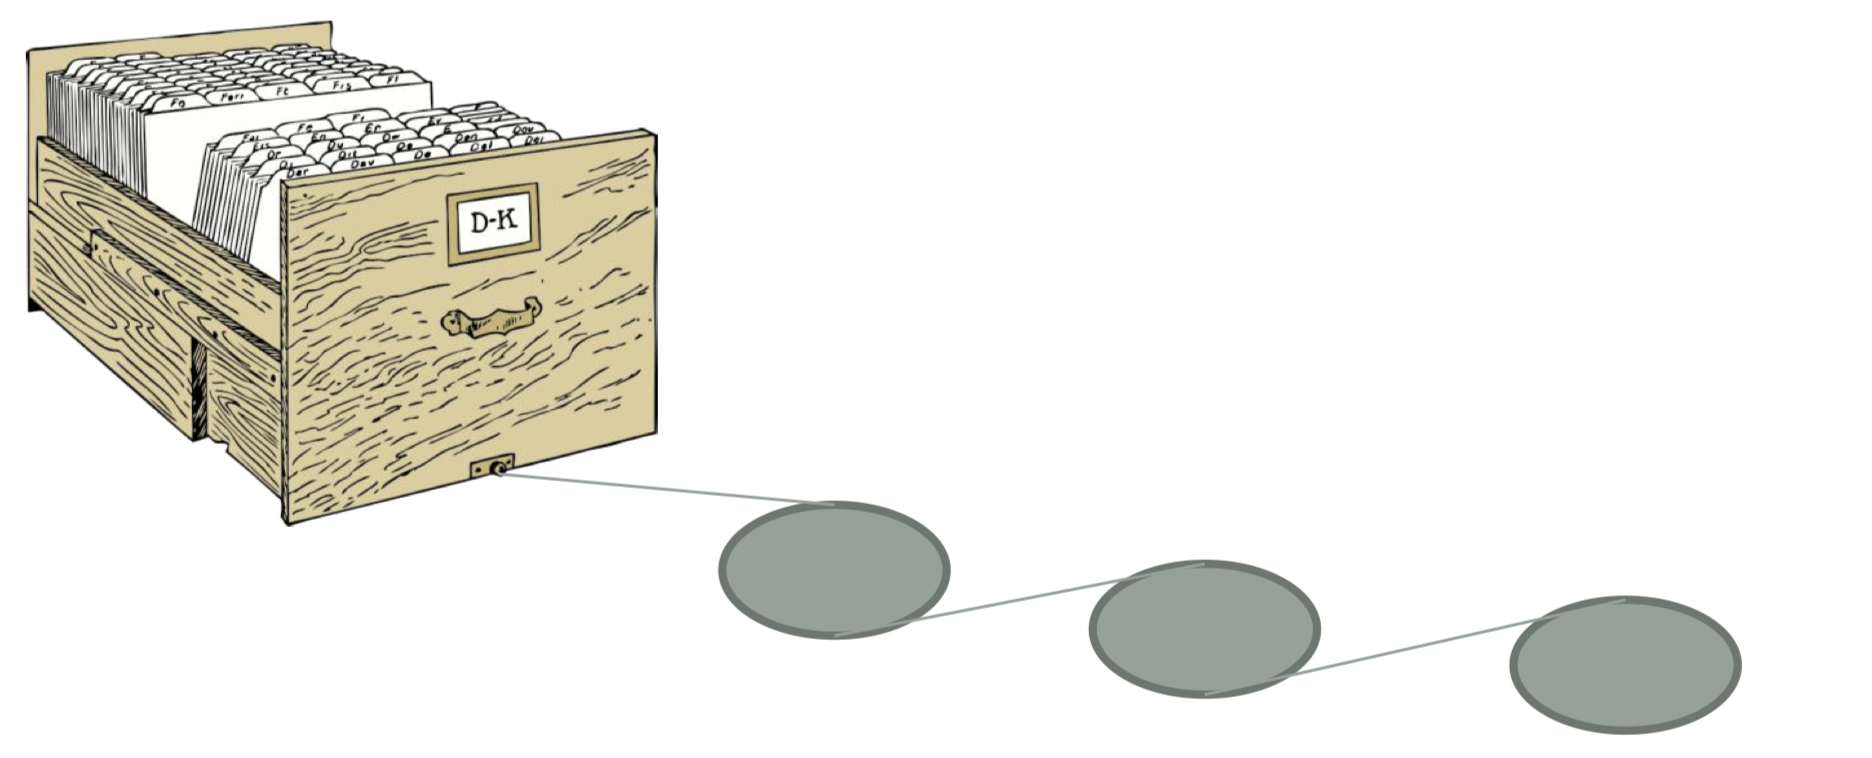

In [2]:
from IPython.display import Image
Image(filename = "/Users/maggie/Desktop/螢幕快照 2019-11-30 下午5.57.51.png")

#參考資料：https://www.csie.ntu.edu.tw/~hsinmu/courses/_media/dsa_12spring/hashing.pdf

使用"Linked List"解決collision，就像是將多餘的資料吊掛在抽屜之下
而每個抽屜都是一個Linked List

In [ ]:
理解後所繪製的流程圖

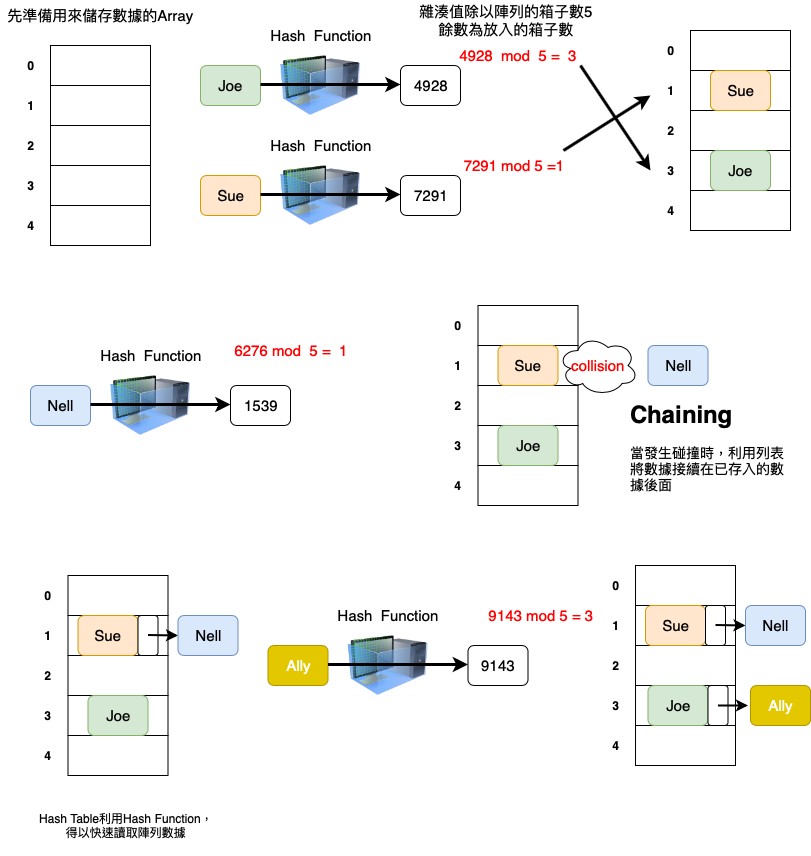

In [3]:
from IPython.display import Image
Image(filename = "/Users/maggie/Desktop/Hash Table流程圖.png")

#Hash Function原理：

將key輸入funtionc後，透過演算法如：MD5(message digest algorithm)、SHA-1、SHA-2等，輸出固定長度且不規則的一串數值（稱為Hash Code），多以16進位表示，所得的不規則值也可視為數據的摘要，適用於告種狀況。

Hash Code雖然用16進位表示，但電腦內部都是以2進位來管理，也就是說，Hash Function在電腦內部一直進行著某種數值運算

特徵：
1.即使輸入非常大的數據（key長度不同），輸出數值的長度都一樣長

2.輸入相同的值，產生相同的輸出值，前提是利用同個演算法

3.即使輸入的數據很相似，輸出的結果差異很大

4.不可逆的，不能從輸出值反推key

5.演算法不同，計算方式也不同，即使輸入相同數據，Hash Code也不一樣


參考資料：演算法圖鑑，石田保輝 宮崎修一著，陳彩華譯

#Hash Table原理：

用來儲存成對數據的資料結構，數據為成對的「鍵」和「值」，以存入每個人的性別為例，鍵為某人的姓名，值為某人的性別，將每個人的資料分別儲存在Array中，尋找時需要從頭依序查詢，這樣的操作稱為「線性搜尋」，隨著數據數量增加，代價隨之增加，效率不佳，因此產生了Hash Table。


通過計算一個關於鍵值的函數（Hash Function），將固定長度且不規則的一串數值放入Hash Table中對應的bucket內，而Hash Table的大小可自行決定。

當數據儲存位置重複時，用列表形式與先前儲存的數據連接。



參考資料https://zh.wikipedia.org/wiki/哈希表

#Hash Table功能：
主要的功能就是“加快搜尋速度”，尋找時，先找到key經MD5所轉換的bucket所屬位置，再從中的Link List尋找，省去了從頭搜尋（又稱為線性搜尋）的時間

#Hash Table 方法說明：

1.add
    (1.)Listnode有空位，直接加入
    (2.)沒空位，順著往下跑，加在linked-list最後

2.delete
    (1.)刪除點在第一個，直接刪除
    (2.))刪除點不在第一個，要將前個數字游標指向刪除點的後一個
    
3.contains
    (1.)Listnode內是空的，表示key不在table裡
    (2.)Listnode有值，如果cur.val = key，return True
    (3.)Listnode有值，如果cur.val != key，順著往下跑，看是否找到key 
 
 
 參考資料：演算法圖鑑，石田保輝 宮崎修一著，陳彩華譯

In [1]:
def add(self, key):
        """
        :type key: int
        :rtype: None
        """
        key_MD5 = self.mycryptoMD5(key)   #經過加密後的十進位數
        key_bucket = key_MD5 % (self.capacity)  #找出key對應的bucket
        print(key + " bucket(add): ")
        print(key_bucket)    #觀察key所放入的bucket
        cur = self.data[key_bucket]
        
        if cur is None:
             cur = ListNode(key_MD5)
        else:   #cur內有值
            while cur.next is not None:
                cur = cur.next
            cur.next = ListNode(key_MD5)

這段程式碼是我一開始打的，但有個問題，12行 if 報錯

問題解決：
cur = self.data[key_bucket]，他們的值雖然是一樣的，但記憶體位置不同

➡️所以"if"中打"cur"，雖然cur的值變了，但是 self.data[key_bucket]的值並沒有變，所以當又有新的值進來時，cur一直會是None

➡️至於"else"中打"cur.next"可以是因為，cur & self.data游標都指向同一個next的記憶體空間

以下是參考資料

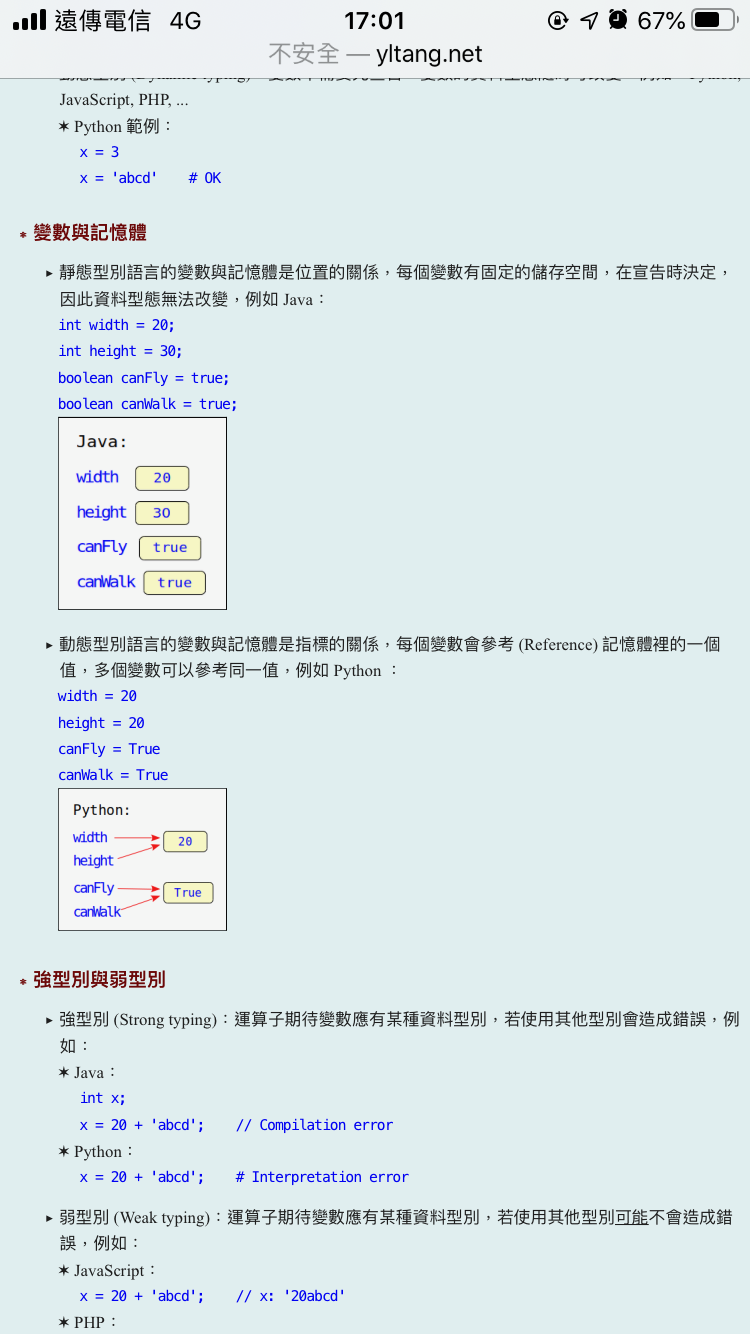

In [2]:
from IPython.display import Image
Image(filename = "/Users/maggie/Desktop/12:6作業/cur解釋_2.png")

修改後的Add如下

In [ ]:
def add(self, key):
        """
        :type key: int
        :rtype: None
        """
        key_MD5 = self.mycryptoMD5(key)   #經過加密後的十進位數
        key_bucket = key_MD5 % (self.capacity)  #找出key對應的bucket
        print(key + " bucket(add): ")
        print(key_bucket)    #觀察key所放入的bucket
        cur = self.data[key_bucket]
        
        if self.data[key_bucket] is None:
             cur = ListNode(key_MD5)
        else:   #cur內有值
            while cur.next is not None:
                cur = cur.next
            cur.next = ListNode(key_MD5)

這是原本不考慮重複值的remove，但我Add是考慮重複值，所以重新修改了一下

In [ ]:
def remove(self, key):
        """
        :type key: int
        :rtype: None
        """
        key_MD5 = self.MyCryptoMD5(key)
        key_bucket = key_MD5 % (self.capacity)
        cur = self.data[key_bucket]
        pre = None
        while cur is not None:
            if cur.val == key_MD5:
                if pre is None:
                    self.data[key_bucket] = cur.next
                else:
                    pre.next = cur.next
                    del(cur)
                break
            else:
                pre = cur
                cur = cur.next

修改後的remove，我就讓每個狀況remove一次後，繼續往下檢查是否還存在重複值

In [ ]:
def remove(self, key):
        """
        :type key: int
        :rtype: None
        """
    
        key_MD5 = self.mycryptoMD5(key)  #經過加密後的十進位數
        key_bucket = key_MD5 % self.capacity #找出key對應的bucket
        cur = self.data[key_bucket]
        pre = None
        
        if self.data[key_bucket] is None:
            return False
        else:      #bucket有值
            while cur is not None:
                if cur.val == key_MD5:
                    if pre is None:
                        self.data[key_bucket] = cur.next
                        pre = None
                        cur = self.data[key_bucket]
                    else:
                        pre.next = cur.next
                        pre = cur
                        cur = cur.next
                else:
                    pre = cur
                    cur = cur.next

contain是我最快做完的部分，我就想兩個立場：

1.找到相對應的bucket，如果“bucket是空”，完全沒有值，直接return False

2.找到相對應的bucket，如果“bucket不是空”，順著往下找，即使有重複，找到一個也結束，return True

In [ ]:
def contains(self, key):
         """
        :type key: int
        :rtype: None
        """

        key_MD5 = self.mycryptoMD5(key)  #經過加密後的十進位數
        key_bucket = key_MD5 % self.capacity #找出key對應的bucket
        cur = self.data[key_bucket]
        
        if cur is None:
            return False
        else:   #cur is not None
            while cur is not None:
                if cur.val == key_MD5:
                    return True
                else:
                    cur = cur.next